<a href="https://colab.research.google.com/github/robin-ochieng/Clustering-Models----Machine-Learning/blob/main/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

## Importing the libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [16]:
data = pd.read_csv('Mall_Customers.csv')
X = data.iloc[:, 3:5].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [17]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Using the elbow method to find the optimal number of clusters

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:968: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  RuntimeWarning,


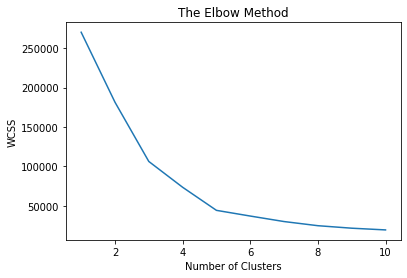

In [18]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters =  i, init = 'k-means++', random_state = 42, algorithm = 'elkan')
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)  
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [19]:
kmeans = KMeans(n_clusters = 5, random_state = 42, init = 'k-means++',algorithm = 'elkan')
y_kmeans = kmeans.fit_predict(X)

In [20]:
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [21]:
data["kmeans"] = y_kmeans.tolist() 

In [22]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),kmeans
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,1
197,198,Male,32,126,74,4
198,199,Male,32,137,18,1


## Visualising the clusters

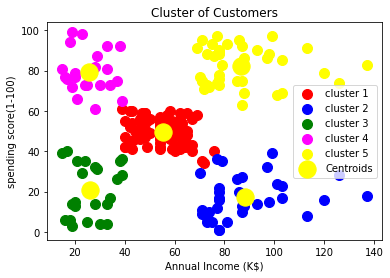

In [25]:
plt.scatter(X[y_kmeans == 0 , 0], X[y_kmeans == 0 , 1], s = 100, c = 'red', label  = 'cluster 1')
plt.scatter(X[y_kmeans == 1 , 0], X[y_kmeans == 1 , 1], s = 100, c = 'blue', label  = 'cluster 2')
plt.scatter(X[y_kmeans == 2 , 0], X[y_kmeans == 2 , 1], s = 100, c = 'green', label  = 'cluster 3')
plt.scatter(X[y_kmeans == 3 , 0], X[y_kmeans == 3 , 1], s = 100, c = 'magenta', label  = 'cluster 4')
plt.scatter(X[y_kmeans == 4 , 0], X[y_kmeans == 4 , 1], s = 100, c = 'yellow', label  = 'cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Cluster of Customers')
plt.xlabel('Annual Income (K$)')
plt.ylabel('spending score(1-100)')
plt.legend()
plt.show()